<a href="https://colab.research.google.com/github/aswink71/Time-Series-Project/blob/main/Univariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
!pip install statsmodels

In [78]:
# importing method for calculating the data
import numpy as nmy
#applying the library for manupulated the data-set
import pandas as pdns
# Data Visualization
import matplotlib.pyplot as mtpl
# here we use the sea born libraries to draw the graph
import seaborn as sns

# use this library for this project
from statsmodels.tsa.stattools import adfuller, acf, pacf
# apply the method of that
import statsmodels.api as sm

# For cross-validation, specifically with time series data,
from sklearn.model_selection import train_test_split,TimeSeriesSplit

# Metrics to evaluate how well models perform
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# using the lyers in the algorithms
from keras.models import Sequential
from keras.layers import Dense,Dropout

# Progress Tracking
from tqdm import tqdm

# removing the causility
import warnings
warnings.filterwarnings("ignore")

# adding this method for timing
from datetime import datetime

In [79]:
# creating a method for reading the dataset
def read_data(file_path):
    # passed the information with the data
    data=pdns.read_csv(file_path)
    # returning the data
    return data

In [80]:
STC_DTA=read_data('/content/drive/MyDrive/Time series project/STC 7010 Historical Data (2).csv')
MOB_DTA=read_data('/content/drive/MyDrive/Time series project/MOBILY 7020 Historical Data (2).csv')
ZAIN_DTA=read_data('/content/drive/MyDrive/Time series project/ZAIN KSA 7030 Historical Data (2).csv')

In [81]:
STC_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,37.95,37.80,37.95,37.60,1.90M,0.40%
1,11/20/2022,37.80,37.85,37.85,37.60,1.82M,0.40%
2,11/17/2022,37.65,38.00,38.05,37.65,3.20M,-0.92%
3,11/16/2022,38.00,37.80,38.00,37.15,3.44M,0.53%
4,11/15/2022,37.80,38.30,38.30,37.50,4.75M,-1.31%


In [82]:
MOB_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,35.65,35.20,35.65,34.85,540.30K,-0.56%
1,11/20/2022,35.85,36.50,36.50,35.20,385.81K,-1.65%
2,11/17/2022,36.45,35.85,36.50,35.55,459.02K,0.97%
3,11/16/2022,36.10,35.00,36.50,35.00,474.77K,3.14%
4,11/15/2022,35.00,35.80,36.00,34.95,633.20K,-2.78%


In [83]:
ZAIN_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,11.40,11.42,11.50,11.30,1.75M,-0.87%
1,11/20/2022,11.50,11.50,11.52,11.38,1.24M,-0.17%
2,11/17/2022,11.52,11.48,11.54,11.36,1.39M,0.35%
3,11/16/2022,11.48,11.34,11.52,11.24,1.98M,0.88%
4,11/15/2022,11.38,11.26,11.38,11.18,2.29M,1.25%


In [84]:
STC_DTA.shape

(1471, 7)

In [85]:
STC_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1471 non-null   object 
 1   Price     1471 non-null   float64
 2   Open      1471 non-null   float64
 3   High      1471 non-null   float64
 4   Low       1471 non-null   float64
 5   Vol.      1471 non-null   object 
 6   Change %  1471 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.6+ KB


In [86]:
MOB_DTA.shape

(1471, 7)

In [87]:
MOB_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1471 non-null   object 
 1   Price     1471 non-null   float64
 2   Open      1471 non-null   float64
 3   High      1471 non-null   float64
 4   Low       1471 non-null   float64
 5   Vol.      1471 non-null   object 
 6   Change %  1471 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.6+ KB


In [88]:
ZAIN_DTA.shape

(1469, 7)

In [89]:
ZAIN_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1469 non-null   object 
 1   Price     1469 non-null   float64
 2   Open      1469 non-null   float64
 3   High      1469 non-null   float64
 4   Low       1469 non-null   float64
 5   Vol.      1469 non-null   object 
 6   Change %  1469 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.5+ KB


In [90]:
print(STC_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [91]:
print(MOB_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [92]:
print(ZAIN_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [93]:
print("STC_DTA Duplicate Rows:", STC_DTA.duplicated().sum())

STC_DTA Duplicate Rows: 0


In [94]:
print("ZAIN_DTA Duplicate Rows:", ZAIN_DTA.duplicated().sum())

ZAIN_DTA Duplicate Rows: 0


In [95]:
print("MOB_DTA Duplicate Rows:", MOB_DTA.duplicated().sum())

MOB_DTA Duplicate Rows: 0


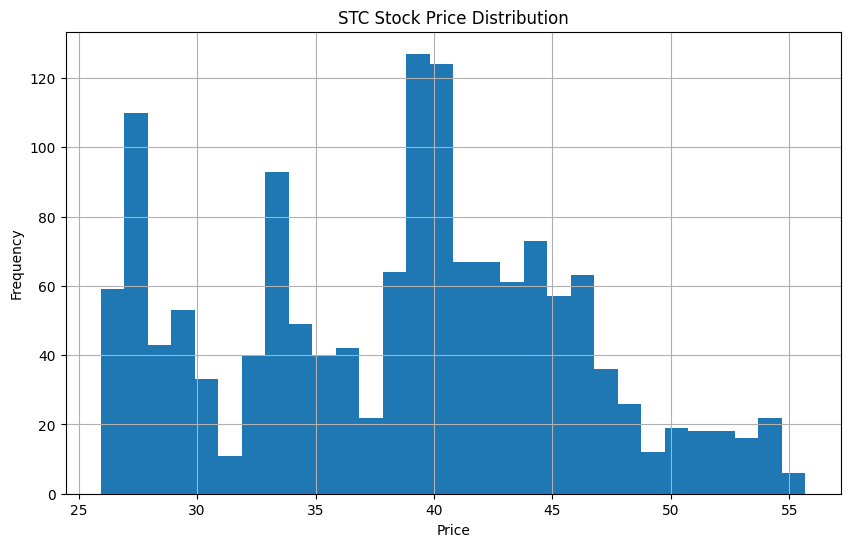

In [96]:
# Price Distribution (Histogram)
mtpl.figure(figsize=(10, 6))
mtpl.hist(STC_DTA['Price'], bins=30)
mtpl.xlabel('Price')
mtpl.ylabel('Frequency')
mtpl.title('STC Stock Price Distribution')
mtpl.grid(True)
mtpl.show()

In [97]:
!pip install PyWavelets

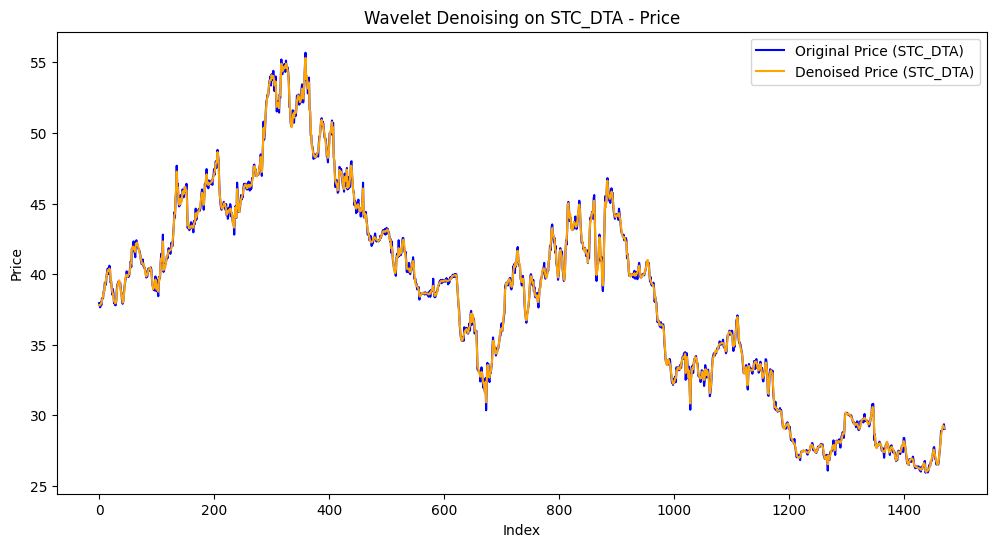

In [98]:
import pywt

# Function to apply Wavelet Denoising to a numerical column
def wavelet_denoise(data,wavelet='db4',level=2):
    coeffs = pywt.wavedec(data,wavelet,level=level) #decomposes the data into wavelet coef
    threshold=nmy.std(coeffs[-1])  # Threshold based on noise level
    coeffs[1:] = [pywt.threshold(c, threshold, mode='soft') for c in coeffs[1:]]  # Apply soft thresholding
    denoised_data = pywt.waverec(coeffs, wavelet) #reconstruction
    # Trim the denoised data to match the original length if necessary
    denoised_data = denoised_data[:len(data)]
    return denoised_data

# Apply denoising to the "Price" column of each dataset
def apply_denoising_to_price_column(dataset):
    denoised_dataset = dataset.copy()
    denoised_dataset['Price'] = wavelet_denoise(dataset['Price'].values)
    return denoised_dataset

# Apply Wavelet Denoising to the "Price" column in each dataset
STC_DTA_denoised = apply_denoising_to_price_column(STC_DTA)
MOB_DTA_denoised = apply_denoising_to_price_column(MOB_DTA)
ZAIN_DTA_denoised = apply_denoising_to_price_column(ZAIN_DTA)

# Visualize original vs denoised data for the "Price" column in STC_DTA
mtpl.figure(figsize=(12, 6))
mtpl.plot(STC_DTA['Price'], label='Original Price (STC_DTA)', color='blue')
mtpl.plot(STC_DTA_denoised['Price'], label='Denoised Price (STC_DTA)', color='orange')
mtpl.title('Wavelet Denoising on STC_DTA - Price')
mtpl.xlabel('Index')
mtpl.ylabel('Price')
mtpl.legend()
mtpl.show()

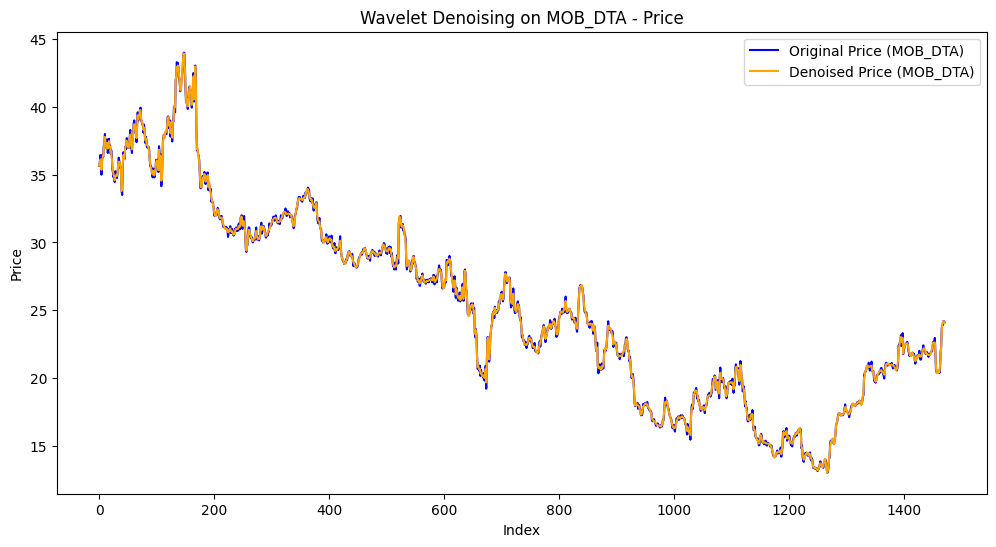

In [99]:
# Visualize original vs denoised data for the "Price" column in MOB_DTA
mtpl.figure(figsize=(12, 6))
mtpl.plot(MOB_DTA['Price'], label='Original Price (MOB_DTA)', color='blue')
mtpl.plot(MOB_DTA_denoised['Price'], label='Denoised Price (MOB_DTA)', color='orange')
mtpl.title('Wavelet Denoising on MOB_DTA - Price')
mtpl.xlabel('Index')
mtpl.ylabel('Price')
mtpl.legend()
mtpl.show()

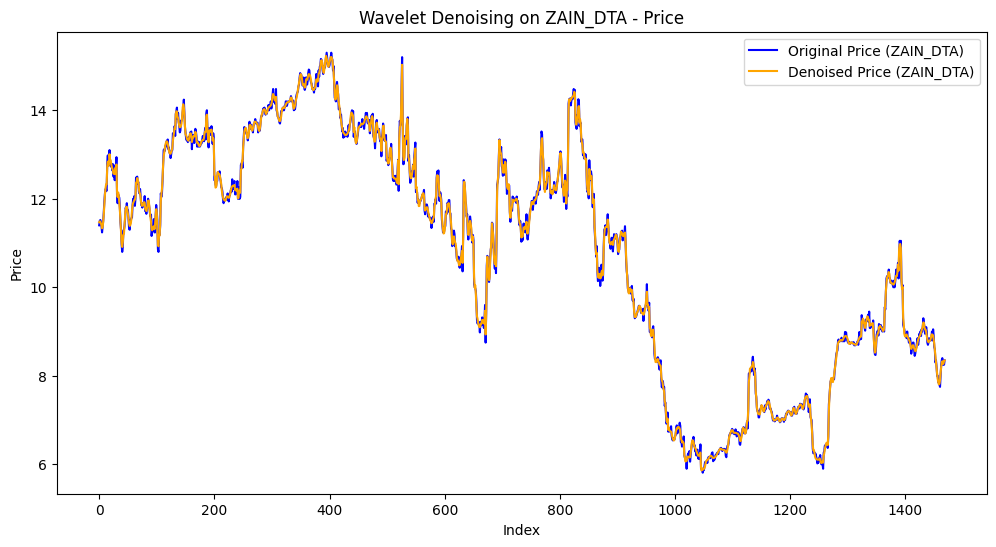

In [100]:
# Visualize original vs denoised data for the "Price" column in ZAIN_DTA
mtpl.figure(figsize=(12, 6))
mtpl.plot(ZAIN_DTA['Price'], label='Original Price (ZAIN_DTA)', color='blue')
mtpl.plot(ZAIN_DTA_denoised['Price'], label='Denoised Price (ZAIN_DTA)', color='orange')
mtpl.title('Wavelet Denoising on ZAIN_DTA - Price')
mtpl.xlabel('Index')
mtpl.ylabel('Price')
mtpl.legend()
mtpl.show()

In [101]:
# Import the necessary library and class
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Apply scaling to the "Price" column in each dataset
STC_DTA_denoised['Price'] = scaler.fit_transform(STC_DTA_denoised[['Price']])
MOB_DTA_denoised['Price'] = scaler.fit_transform(MOB_DTA_denoised[['Price']])
ZAIN_DTA_denoised['Price'] = scaler.fit_transform(ZAIN_DTA_denoised[['Price']])

<Figure size 1200x600 with 0 Axes>

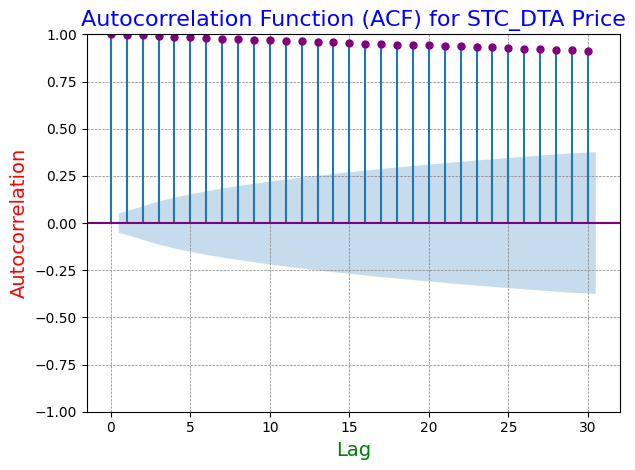

<Figure size 1200x600 with 0 Axes>

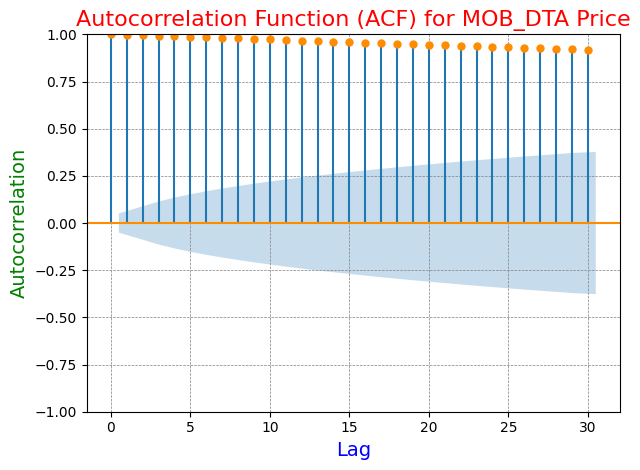

<Figure size 1200x600 with 0 Axes>

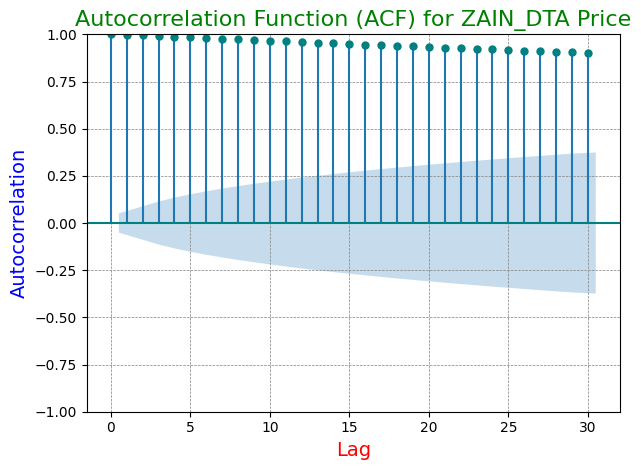

In [102]:
# Define a function to plot ACF with customizable colors
def plot_acf_custom(data, title, xlabel_color, ylabel_color, title_color, acf_color, lags=30):
    mtpl.figure(figsize=(12, 6))
    sm.graphics.tsa.plot_acf(data, lags=lags, color=acf_color)  # ACF line with custom color
    mtpl.title(title, fontsize=16, color=title_color)  # Title with custom color
    mtpl.xlabel('Lag', fontsize=14, color=xlabel_color)  # X-axis label with custom color
    mtpl.ylabel('Autocorrelation', fontsize=14, color=ylabel_color)  # Y-axis label with custom color
    mtpl.grid(color='gray', linestyle='--', linewidth=0.5)  # Grid lines for clarity
    mtpl.tight_layout()
    mtpl.show()

# Plot ACF for STC_DTA with custom colors
plot_acf_custom(
    data=STC_DTA_denoised['Price'],
    title='Autocorrelation Function (ACF) for STC_DTA Price',
    xlabel_color='green', ylabel_color='red', title_color='blue', acf_color='purple'
)

# Plot ACF for MOB_DTA with custom colors
plot_acf_custom(
    data=MOB_DTA_denoised['Price'],
    title='Autocorrelation Function (ACF) for MOB_DTA Price',
    xlabel_color='blue', ylabel_color='green', title_color='red', acf_color='darkorange'
)

# Plot ACF for ZAIN_DTA with custom colors
plot_acf_custom(
    data=ZAIN_DTA_denoised['Price'],
    title='Autocorrelation Function (ACF) for ZAIN_DTA Price',
    xlabel_color='red', ylabel_color='blue', title_color='green', acf_color='teal'
)


<Figure size 1200x600 with 0 Axes>

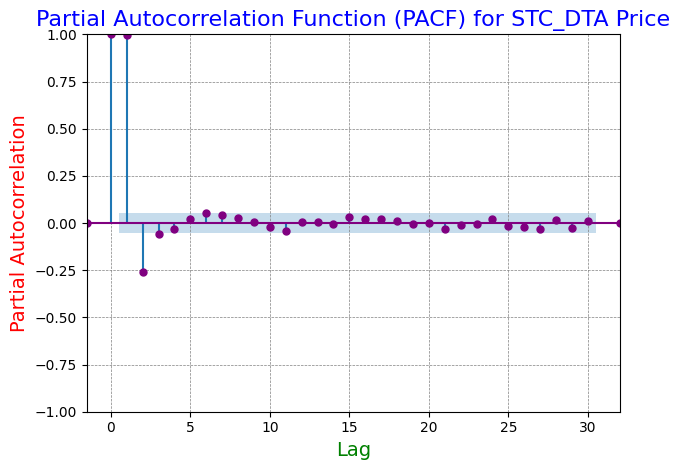

<Figure size 1200x600 with 0 Axes>

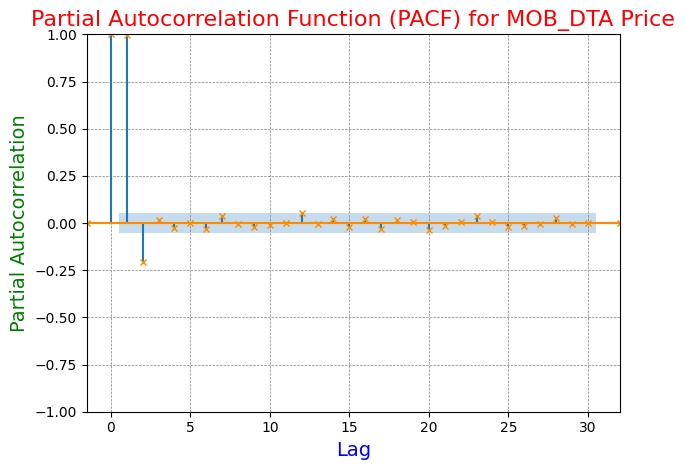

<Figure size 1200x600 with 0 Axes>

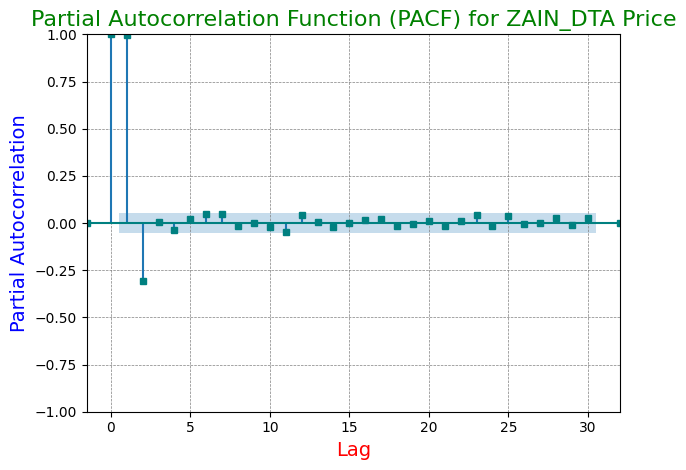

In [103]:
# Define a function to plot PACF with customizable colors and styles
def plot_pacf_custom(data, title, xlabel_color, ylabel_color, title_color, pacf_color, lags=30, marker='o'):
    mtpl.figure(figsize=(12, 6))
    sm.graphics.tsa.plot_pacf(data, lags=lags, color=pacf_color, markersize=5, marker=marker)  # PACF with marker and color
    mtpl.title(title, fontsize=16, color=title_color)  # Title with custom color
    mtpl.xlabel('Lag', fontsize=14, color=xlabel_color)  # X-axis label with custom color
    mtpl.ylabel('Partial Autocorrelation', fontsize=14, color=ylabel_color)  # Y-axis label with custom color
    mtpl.grid(color='gray', linestyle='--', linewidth=0.5)  # Grid lines for clarity
    mtpl.tight_layout()
    mtpl.show()

# Plot PACF for STC_DTA with custom colors and marker type
plot_pacf_custom(
    data=STC_DTA_denoised['Price'],
    title='Partial Autocorrelation Function (PACF) for STC_DTA Price',
    xlabel_color='green', ylabel_color='red', title_color='blue', pacf_color='purple', lags=30, marker='o'
)

# Plot PACF for MOB_DTA with custom colors and marker type
plot_pacf_custom(
    data=MOB_DTA_denoised['Price'],
    title='Partial Autocorrelation Function (PACF) for MOB_DTA Price',
    xlabel_color='blue', ylabel_color='green', title_color='red', pacf_color='darkorange', lags=30, marker='x'
)

# Plot PACF for ZAIN_DTA with custom colors and marker type
plot_pacf_custom(
    data=ZAIN_DTA_denoised['Price'],
    title='Partial Autocorrelation Function (PACF) for ZAIN_DTA Price',
    xlabel_color='red', ylabel_color='blue', title_color='green', pacf_color='teal', lags=30, marker='s'
)


In [104]:
STC_DTA_denoised['Date'] = pdns.to_datetime(STC_DTA_denoised['Date'])
MOB_DTA_denoised['Date'] = pdns.to_datetime(MOB_DTA_denoised['Date'])
ZAIN_DTA_denoised['Date'] = pdns.to_datetime(ZAIN_DTA_denoised['Date'])

In [105]:
STC_DTA_denoised = STC_DTA_denoised.set_index('Date')
MOB_DTA_denoised = MOB_DTA_denoised.set_index('Date')
ZAIN_DTA_denoised = ZAIN_DTA_denoised.set_index('Date')

In [106]:
STC_DTA_denoised.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-11-21,-0.102884,37.80,37.95,37.60,1.90M,0.40%
2022-11-20,-0.105638,37.85,37.85,37.60,1.82M,0.40%
2022-11-17,-0.102403,38.00,38.05,37.65,3.20M,-0.92%
2022-11-16,-0.092953,37.80,38.00,37.15,3.44M,0.53%
2022-11-15,-0.079073,38.30,38.30,37.50,4.75M,-1.31%


In [107]:
# defining the function with the data
def calculate_metrics(y_true,y_pred):
  # calculating the values of errors with the data
  mse=mean_squared_error(y_true,y_pred)
  #find out the (RMSE) by taking the square root of MSE
  rmse=nmy.sqrt(mse)
  # Determine the actual and anticipated values
  mae=mean_absolute_error(y_true,y_pred)
  # To determine the Percentage Error
  r2=r2_score(y_true,y_pred)
  # To calculate the averagerror
  def mean_absolute_percentage_error(y_true,y_pred):
      # Convert and to numpy arrays if they are not already
      y_true,y_pred=nmy.array(y_true),nmy.array(y_pred)
      # returning the values of data
      return nmy.mean(nmy.abs((y_true - y_pred) / y_true)) *10
  # evaluting the valeus with the data
  mape=mean_absolute_percentage_error(y_true,y_pred)
  # showing the values of this result
  print("Mean Absolute Error (MAE):",mae)
  # evaluting the score with the values
  print("Mean Squared Error (MSE):",mse)
  # finding the values of result with the models
  print("Root Mean Squared Error (RMSE):",rmse)
  # getting the score with the tested data
  print("Mean Absolute Percentage Error (MAPE):",mape)

  print("R-squared (R2):", r2)


# STC Dataset

In [108]:
time_steps = 20

# Modifying the data to fit the algorithms
def reshape_data(data,time_steps=20):
    # creating the empty list
    X, y = [], []
    #Fixed the indexing issue
    for i in range(len(data) - time_steps -1):
        # Select the first column (Price_scaled)
        X.append(data[i:(i + time_steps), 0])
        # Select the first column (Price_scaled)
        y.append(data[i + time_steps, 0])
    # returning the data
    return nmy.array(X),nmy.array(y)

# Converting the to a 2D array (adding a second dimension)
price_scaled_Denoise=STC_DTA_denoised['Price'].values.reshape(-1, 1)

# Call reshape_data
X, y=reshape_data(price_scaled_Denoise, time_steps)

In [109]:
# This ensures that the last 14 data points will be used as the test set
train_size = len(X) - 14
# Separating the feature data X into sets for testing and training.
X_train, X_test = X[:train_size], X[train_size:]
# The training and test sets are separated out of the feature data X.
y_train, y_test = y[:train_size], y[train_size:]

In [110]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1436, 20)
y_train shape: (1436,)
X_test shape: (14, 20)
y_test shape: (14,)


# Random Forest Regression

In [111]:
# use the algorithms with the suitabel parameter
from sklearn.ensemble import RandomForestRegressor
# getting the score of the models
from sklearn.metrics import r2_score
# Setting up optimized hyper-parameters for the algorithms.
rf_model=RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=5,random_state=42)

# using the trained infromation to the model
rf_model.fit(X_train,y_train)

# Make forecasts using the test set.
pd_rf_stc=rf_model.predict(X_test)
# calculating the prediction with the algorithms
trn_rf_stc=rf_model.predict(X_train)

# Training Result

In [112]:
# Examine the model using the training data.
calculate_metrics(y_train,trn_rf_stc)

Mean Absolute Error (MAE): 0.0158055470084265
Mean Squared Error (MSE): 0.0005795750459507233
Root Mean Squared Error (RMSE): 0.024074364912718325
Mean Absolute Percentage Error (MAPE): 1.6836912448971528
R-squared (R2): 0.9994211650783991


# Testing Result

In [113]:
# Examine the model using the test data.
calculate_metrics(y_test, pd_rf_stc)

Mean Absolute Error (MAE): 0.035404647677451294
Mean Squared Error (MSE): 0.001632246826793459
Root Mean Squared Error (RMSE): 0.04040107457473698
Mean Absolute Percentage Error (MAPE): 0.24761338676764938
R-squared (R2): 0.9259542319615895


# Reshape Dataset

In [114]:
# Modify the information for ANN
X_train_ann=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
# getting the vlaues of changing the shape
X_test_ann=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

# ANN Model

In [115]:
# adding the layers of this algorithms
from tensorflow.keras.models import Sequential
#Utilize the algorithms with the lyes.
from tensorflow.keras.layers import Dense

modl_ann=Sequential()
# adding the layers in the algorithms
modl_ann.add(Dense(units=50,activation='relu',input_dim=X_train_ann.shape[1]))
# Including an additional dropout layer to avoid overfitting
modl_ann.add(Dense(units=25,activation='relu'))
# Regression's output layer
modl_ann.add(Dense(units=1))

# Putting the model together.
modl_ann.compile(optimizer='adam',loss='mse')

#Getting the model informed.
modl_ann.fit(X_train_ann,y_train,epochs=100,batch_size=32,verbose=1,validation_data=(X_test_ann,y_test))

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0328 - val_loss: 0.0110
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 - val_loss: 0.0114
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - val_loss: 0.0088
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115 - val_loss: 0.0093
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 - val_loss: 0.0136
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - val_loss: 0.0121
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0077
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - val_loss: 0.0089
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - val_loss: 0.0093
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - val_loss: 0.0128
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0094
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

In [116]:
modl_ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,055 (27.56 KB)

 Trainable params: 2,351 (9.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,704 (18.38 KB)

In [117]:
# Predicted using the testing and training sets.
train_pred_ann=modl_ann.predict(X_train_ann)
# Forecasting the training as well as testing sets.
test_pred_ann=modl_ann.predict(X_test_ann)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


# Training Result

In [118]:
print("ANN Training Set Evaluation:")
calculate_metrics(y_train,train_pred_ann.flatten())

ANN Training Set Evaluation:
Mean Absolute Error (MAE): 0.04285419117006982
Mean Squared Error (MSE): 0.0034622903168357415
Root Mean Squared Error (RMSE): 0.058841229735923616
Mean Absolute Percentage Error (MAPE): 2.720467904714577
R-squared (R2): 0.9965421310698118


# Testing Result

In [119]:
print("\nANN Testing Set Evaluation:")
calculate_metrics(y_test,test_pred_ann.flatten())


ANN Testing Set Evaluation:
Mean Absolute Error (MAE): 0.021152315285199754
Mean Squared Error (MSE): 0.0007672251351403073
Root Mean Squared Error (RMSE): 0.027698829129411
Mean Absolute Percentage Error (MAPE): 0.140312134652421
R-squared (R2): 0.9651953531431029


In [120]:
# Forecasting the training as well as testing sets.
def plot_actual_vs_predicted(index, y_test, tst_prd_dt, test_pred_cnn, title='Actual vs. Predicted Price', xlabel='Date', ylabel='Price'):

    # Creating a Data-Frame for plotting
    plot_df=pdns.DataFrame({
        'Actual': y_test,
        'Predicted_rf': tst_prd_dt,
        'Predicted_ann': test_pred_cnn.flatten()
    }, index=index)

    # Charting the current and anticipated pricing.
    mtpl.figure(figsize=(12,6))
    # Creating a line graph by plotting the value from plot_df.
    mtpl.plot(plot_df.index,plot_df['Actual'],label='Actual Price',color='blue')
    #The value from plot_df is plotted to create a line graph.
    mtpl.plot(plot_df.index,plot_df['Predicted_rf'],label='Predicted Price (Random Forest)',color='green')
    # getting the plotted with the datagrame with parameter
    mtpl.plot(plot_df.index,plot_df['Predicted_ann'],label='Predicted Price (ANN Model)',color='red')

    # setting the headertext in the plot
    mtpl.title(title,fontsize=16)
    # establishing the labels for the x and y axes
    mtpl.xlabel(xlabel,fontsize=14)
    # putting labels on the x and y axes
    mtpl.ylabel(ylabel,fontsize=14)

    # Include the grid and legend.
    mtpl.legend()
    # Adding grid lines for clarity
    mtpl.grid(True)

    # To improve readability, rotate the x-axis labels.
    mtpl.xticks(rotation=45)

    # Ensuring the plot layout is optimized
    mtpl.tight_layout()

    # Displaying the plot
    mtpl.show()

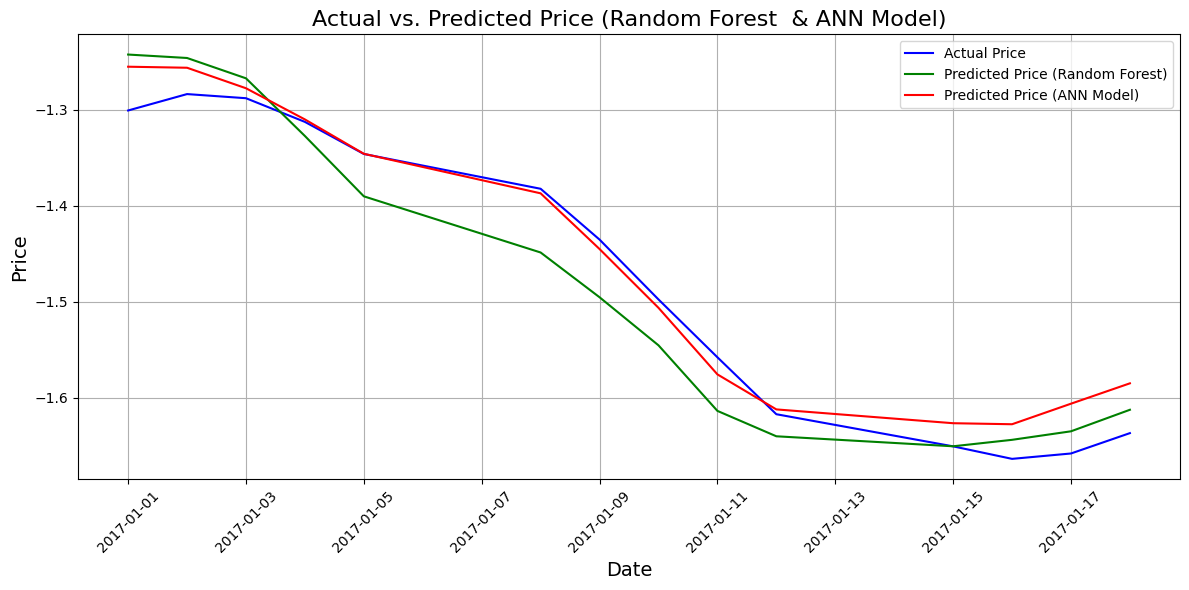

In [121]:
plot_actual_vs_predicted(
    index=STC_DTA_denoised.index[-len(y_test):], #date
    y_test=y_test, #actual values
    tst_prd_dt=pd_rf_stc, #predicted
    test_pred_cnn=test_pred_ann,
    title='Actual vs. Predicted Price (Random Forest  & ANN Model)',
    xlabel='Date',
    ylabel='Price'
)

In [122]:
def plot_model_metrics_comparison(y_test, tst_prd_dt, test_pred_cnn, model_names=['a', 'b']):

    # Create a dictionary to store the metrics for each model
    metrics_data = {
        model_names[0]: {
            'MAE': mean_absolute_error(y_test,tst_prd_dt),
            'MSE': mean_squared_error(y_test,tst_prd_dt),
            'RMSE': nmy.sqrt(mean_squared_error(y_test,tst_prd_dt)),
            'MAPE': nmy.mean(nmy.abs((y_test - tst_prd_dt) / y_test)) * 10,
            'R2': r2_score(y_test,tst_prd_dt)
        },
        model_names[1]: {
            'MAE': mean_absolute_error(y_test,test_pred_cnn.flatten()),
            'MSE': mean_squared_error(y_test,test_pred_cnn.flatten()),
            'RMSE': nmy.sqrt(mean_squared_error(y_test,test_pred_cnn.flatten())),
            'MAPE': nmy.mean(nmy.abs((y_test - test_pred_cnn.flatten()) / y_test)) * 10,
            'R2': r2_score(y_test,test_pred_cnn.flatten())
        }
    }

    # Create a list of metrics
    metrics=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2']

    # Constructing the bar graph's figure and axes.
    fig,ax=mtpl.subplots(figsize=(10, 6))

   # Defining how wide the bars are.
    bar_width=0.35
    # Determine the bar placements on the x-axis.
    x=nmy.arange(len(metrics))

    # Plot the bars for each model
    rects1 = ax.bar(x - bar_width / 2, [metrics_data[model_names[0]][metric] for metric in metrics],
                    width=bar_width, label=model_names[0], color='green') #bars for RF
    rects2 = ax.bar(x + bar_width / 2, [metrics_data[model_names[1]][metric] for metric in metrics],
                    width=bar_width, label=model_names[1], color='red')

    # Configure tick labels on the x-axis.
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)

   # Assign axis headings and a heading.
    ax.set_title(f'Comparison of {model_names[0]} and {model_names[1]} Model Performance')
    ax.set_ylabel('Metric Value')

    # Add a legend
    ax.legend()

    # Add grid lines for clarity
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adding result value labels on top of the bars
    def autolabel(rects):
       # applying the looping the values
        for rect in rects:
           # getting the values of heiht
            height=rect.get_height()
            # showing the values of graph
            ax.annotate(f'{height:.2f}',
                        # Setting the position of the annotation text
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        # Adjust the annotation text's position.
                        xytext=(0, 3),
                        # Specify that the offset is in points relative to the original position
                        textcoords="offset points",
                        # Setting the color of the annotation text
                        ha='center', va='bottom', fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    # Ensure the layout is tight and show the plot
    mtpl.tight_layout()
    mtpl.show()


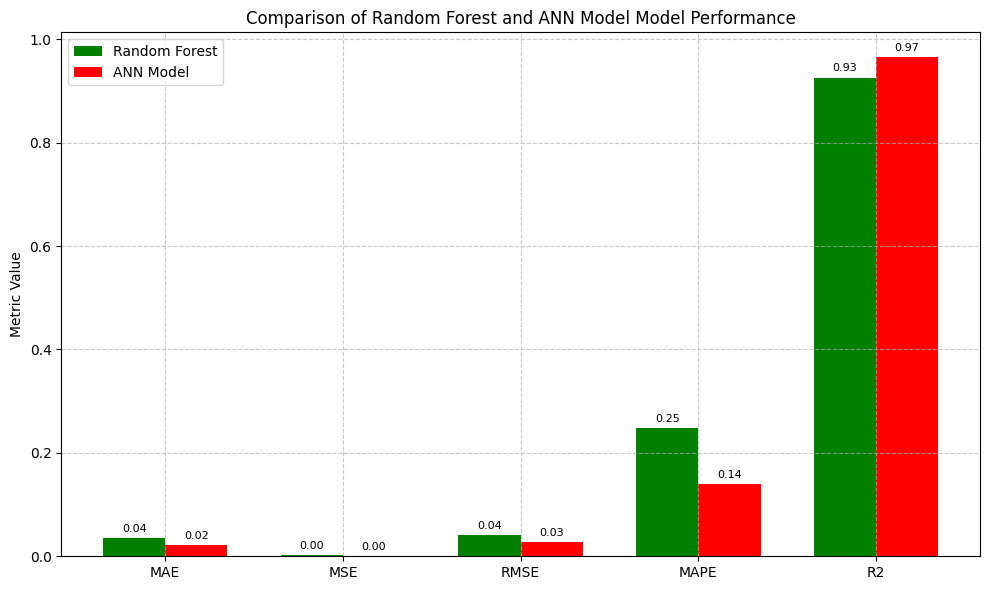

In [123]:
# Assuming `y_test`, `tst_prd_dt`, and `test_pred_cnn` are already defined:
plot_model_metrics_comparison(y_test, pd_rf_stc, test_pred_ann, model_names=['Random Forest', 'ANN Model'])

# Mobily Dataset

In [124]:
time_steps = 20

#Reforming the  to fit the LSTM
def reshape_data(data, time_steps=20):
    X, y = [], []
    #Resolved the indexing problem
    for i in range(len(data) - time_steps -1):
        # Click on Price_scaled, the first column.
        X.append(data[i:(i + time_steps), 0])
        # Select the first column (Price_scaled)
        y.append(data[i + time_steps, 0])
    return nmy.array(X), nmy.array(y)

# Converting the to a 2D array (adding a second dimension)
MOB_scaled_Denoise=MOB_DTA_denoised['Price'].values.reshape(-1, 1)

# Make use of reshape_data
X, y= reshape_data(MOB_scaled_Denoise, time_steps)

In [125]:
# Determining the training size by subtracting 14 from the length of X
train_size_MOB=len(X) - 14
# Splitting the feature data X into training and testing sets
X_train_mob,X_test_mob=X[:train_size_MOB],X[train_size_MOB:]
# Separating the feature dataset X into sets for testing and training
y_train_mob,y_test_mob=y[:train_size_MOB],y[train_size_MOB:]

In [126]:
print("X_train_mob shape:",X_train_mob.shape)
print("y_train_mob shape:",y_train_mob.shape)
print("X_test_mob shape:",X_test_mob.shape)
print("y_test_mob shape:",y_test_mob.shape)

X_train_mob shape: (1436, 20)
y_train_mob shape: (1436,)
X_test_mob shape: (14, 20)
y_test_mob shape: (14,)


# Random Forest Regression

In [127]:
# Initialize the with tuned hyper-para-meters (increased complexity)
rf_model_mob=RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_split=3,random_state=42)

# Educate the example to emulate
rf_model_mob.fit(X_train_mob,y_train_mob)

# Make forecasts using the test set.
pd_rf_mob=rf_model_mob.predict(X_test_mob)
# obtaining the variable values using the tested data
trn_rf_mob=rf_model_mob.predict(X_train_mob)

# Training Result

In [128]:
# Use the training set to assess the model.
print("Mobily Training Set Evaluation:")
calculate_metrics(y_train_mob, trn_rf_mob)

Mobily Training Set Evaluation:
Mean Absolute Error (MAE): 0.011223269292883687
Mean Squared Error (MSE): 0.00039146032092253144
Root Mean Squared Error (RMSE): 0.01978535622430214
Mean Absolute Percentage Error (MAPE): 1.6715307022098158
R-squared (R2): 0.9996030374590142


# Testing Result

In [129]:
# Assess the model using the training data.
print("\nMobily Testing Set Evaluation:")
calculate_metrics(y_test_mob, pd_rf_mob)


Mobily Testing Set Evaluation:
Mean Absolute Error (MAE): 0.044160541859762335
Mean Squared Error (MSE): 0.0031766426133759463
Root Mean Squared Error (RMSE): 0.05636171229989332
Mean Absolute Percentage Error (MAPE): 1.257840157760475
R-squared (R2): 0.9353416531494145


# Reshape the dataset

In [130]:
# Reshape the data for ANN
X_train_ann_mob=X_train_mob.reshape(X_train_mob.shape[0],X_train_mob.shape[1], 1)
X_test_ann_mob=X_test_mob.reshape(X_test_mob.shape[0],X_test_mob.shape[1], 1)

# ANN Model

In [131]:
mol_ann_mob=Sequential()
# Include the first dense layer with the ReLU activation function and 100 units (neurons) in the model.
mol_ann_mob.add(Dense(units=100,activation='relu',input_dim=X_train_ann_mob.shape[1]))
# Adding another dense layer with 50 units and ReLU activation.
mol_ann_mob.add(Dense(units=50,activation='relu'))
# Including a ReLU activation function and a third dense layer with 25 units (neurons).
mol_ann_mob.add(Dense(units=25,activation='relu'))
# Adding the output Dense layer with 1 unit. Since this is likely a regression
mol_ann_mob.add(Dense(units=1))

#Building the model using a new learning rate and optimizer
mol_ann_mob.compile(optimizer='adam',loss='mse')

# Use a larger batch size and much more epochs to train the model.
mol_ann_mob.fit(X_train_ann_mob,y_train_mob,epochs=130,batch_size=64,verbose=1,validation_data=(X_test_ann_mob,y_test_mob))

Epoch 1/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4049 - val_loss: 0.0579
Epoch 2/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0275 - val_loss: 0.0646
Epoch 3/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - val_loss: 0.0570
Epoch 4/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0482
Epoch 5/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_loss: 0.0355
Epoch 6/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - val_loss: 0.0327
Epoch 7/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - val_loss: 0.0253
Epoch 8/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - val_loss: 0.0191
Epoch 9/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0179
Epoch 10/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0155
Epoch 11/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - val_loss: 0.0151
Epoch 12/130
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [132]:
mol_ann_mob.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,355 (99.05 KB)

 Trainable params: 8,451 (33.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,904 (66.04 KB)

In [133]:
# Predicting using the testing along with training sets.
train_pred_ann_mob=mol_ann_mob.predict(X_train_ann_mob)
# getting the values of testing information
test_pred_ann_mob=mol_ann_mob.predict(X_test_ann_mob)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


# Training Result

In [134]:
# # Training Result
calculate_metrics(y_train_mob,train_pred_ann_mob.flatten())

Mean Absolute Error (MAE): 0.024931932033846717
Mean Squared Error (MSE): 0.0017185663348769566
Root Mean Squared Error (RMSE): 0.04145559473553548
Mean Absolute Percentage Error (MAPE): 2.4572214190521784
R-squared (R2): 0.9982572781385922


# Testing Result

In [135]:
#Testing Result
calculate_metrics(y_test_mob,test_pred_ann_mob.flatten())

Mean Absolute Error (MAE): 0.048333795625633114
Mean Squared Error (MSE): 0.003558194480504135
Root Mean Squared Error (RMSE): 0.05965060335406621
Mean Absolute Percentage Error (MAPE): 1.6555988023547017
R-squared (R2): 0.927575430766581


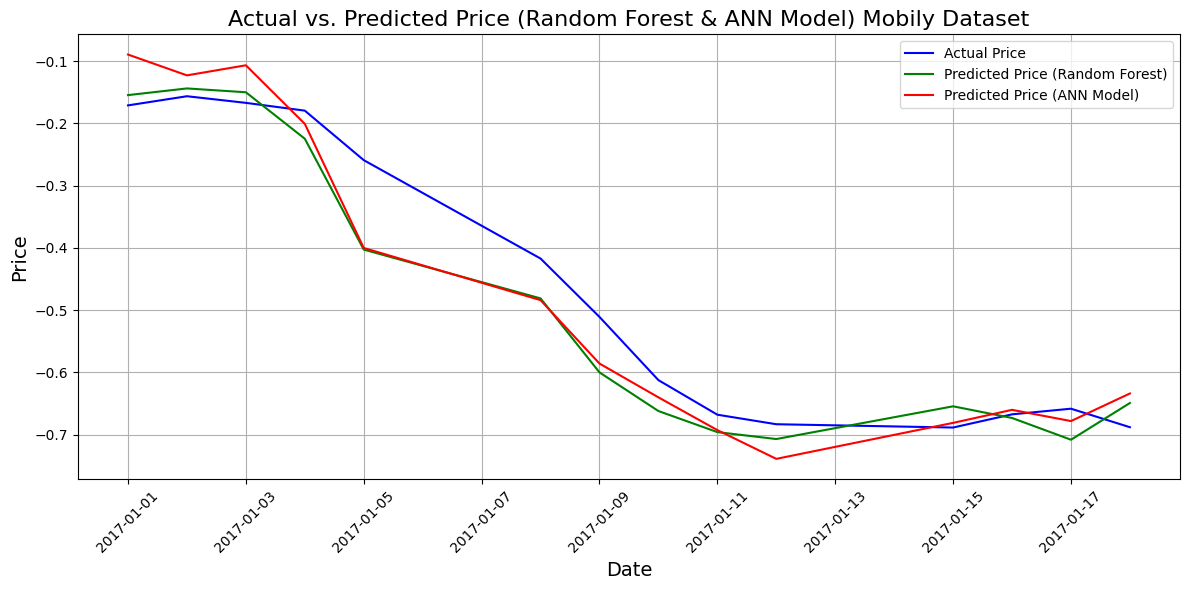

In [136]:
plot_actual_vs_predicted(
    index=MOB_DTA_denoised.index[-len(y_test_mob):],
    y_test=y_test_mob,
    tst_prd_dt=pd_rf_mob,
    test_pred_cnn=test_pred_ann_mob,
    title='Actual vs. Predicted Price (Random Forest & ANN Model) Mobily Dataset',
    xlabel='Date',
    ylabel='Price'
)


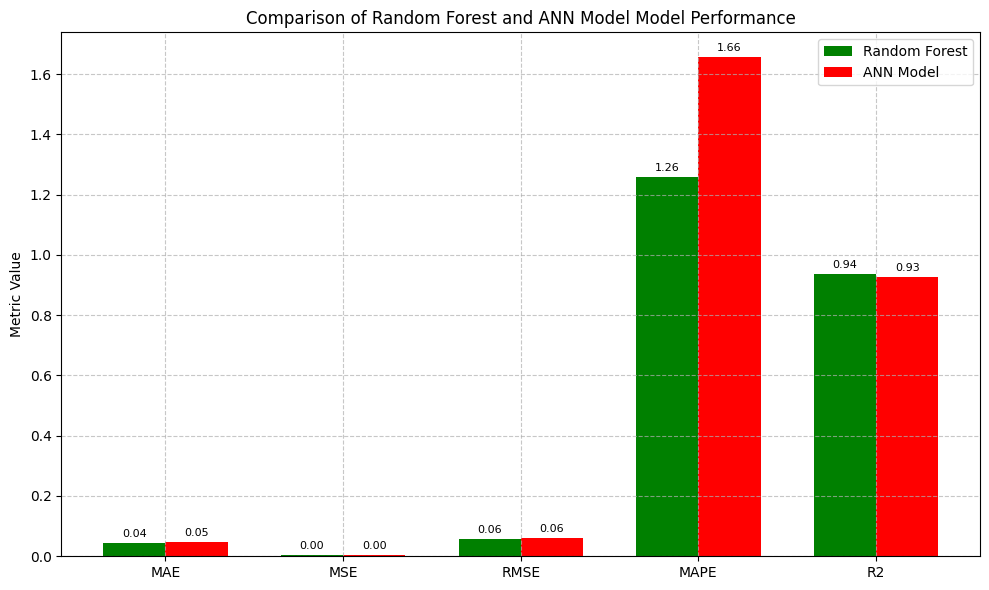

In [137]:
plot_model_metrics_comparison(y_test_mob, pd_rf_mob, test_pred_ann_mob, model_names=['Random Forest', 'ANN Model'])

# Zain Dataset

In [138]:
time_steps = 20

# Modifying the information for the LSTM approach
def reshape_data(data,time_steps=20):
    X, y = [],[]
    #Fixed the indexing issue
    for i in range(len(data) - time_steps -1):
        # Select the first column (Price_scaled)
        X.append(data[i:(i + time_steps), 0])
        # Choose the Price_scaled column.
        y.append(data[i + time_steps, 0])
    # returning the array with the data
    return nmy.array(X), nmy.array(y)

# Converting to a 2D array (adding a second dimension)
ZAIN_scld_Denoise=ZAIN_DTA_denoised['Price'].values.reshape(-1, 1)

# Make use of reshape_data
X, y =reshape_data(ZAIN_scld_Denoise, time_steps)

In [139]:
train_size_ZAIN=len(X) - 14
X_train_zain,X_test_zain=X[:train_size_ZAIN],X[train_size_ZAIN:]
y_train_zain,y_test_zain = y[:train_size_ZAIN],y[train_size_ZAIN:]

In [140]:
print("X_train_zain shape:",X_train_zain.shape)
print("y_train_zain shape:",y_train_zain.shape)
print("X_test_zain shape:",X_test_zain.shape)
print("y_test_zain shape:",y_test_zain.shape)

X_train_zain shape: (1434, 20)
y_train_zain shape: (1434,)
X_test_zain shape: (14, 20)
y_test_zain shape: (14,)


# Random Forest Regression

In [141]:
# Initializing the with tuned hyper-para-meters
rf_model_zain=RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_split=2,random_state=42)

# Educating the example to emulate
rf_model_zain.fit(X_train_zain,y_train_zain)

#Create forecasts for the test set.
pd_rf_zain=rf_model_zain.predict(X_test_zain)
#Generate test set forecasts.
trn_rf_zain=rf_model_zain.predict(X_train_zain)

# Training Result

In [142]:
# Use the training set to assess the model.
print("Zain Training Set Evaluation:")
calculate_metrics(y_train_zain, trn_rf_zain)

Zain Training Set Evaluation:
Mean Absolute Error (MAE): 0.012900958426995374
Mean Squared Error (MSE): 0.0004964646733505033
Root Mean Squared Error (RMSE): 0.022281487233811466
Mean Absolute Percentage Error (MAPE): 0.8417607930467523
R-squared (R2): 0.9995082219855984


# Testing Result

In [143]:
# Examine the model using the test data.
calculate_metrics(y_test_zain, pd_rf_zain)

Mean Absolute Error (MAE): 0.0273327380282312
Mean Squared Error (MSE): 0.001175999950530268
Root Mean Squared Error (RMSE): 0.034292855677681144
Mean Absolute Percentage Error (MAPE): 0.2693255851611723
R-squared (R2): 0.7787298650324271


# Reshape the dataset

In [144]:
# Reshape the data for ANN
X_train_ann_zain=X_train_zain.reshape(X_train_zain.shape[0],X_train_zain.shape[1], 1)
X_test_ann_zain=X_test_zain.reshape(X_test_zain.shape[0],X_test_zain.shape[1], 1)

# ANN Model

In [145]:
mod_ann_zain=Sequential()
#The input dimension is set to the number of features in the training data.
mod_ann_zain.add(Dense(units=150,activation='relu',input_dim=X_train_ann_zain.shape[1]))
# Adding a second Dense layers activation function.
mod_ann_zain.add(Dense(units=75,activation='relu'))
# Include a ReLU activation function and 25 units (neurons).
mod_ann_zain.add(Dense(units=30,activation='relu'))
# Include one unit of the output Dense layer. Given that this task is probably a regression one,
mod_ann_zain.add(Dense(units=1))

#building the algorithms with a different optimizer and learning rate
mod_ann_zain.compile(optimizer='adam',loss='mse')

# Train the model with more epochs and a larger batch size
mod_ann_zain.fit(X_train_ann_zain,y_train_zain,epochs=100,batch_size=16,verbose=1,validation_data=(X_test_ann_zain,y_test_zain))

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0942 - val_loss: 0.0141
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0050
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - val_loss: 0.0029
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0052
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0027
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

In [146]:
# Prediction using the testing and practice sets.
train_pred_ann_zain=mod_ann_zain.predict(X_train_ann_zain)
test_pred_ann_zain=mod_ann_zain.predict(X_test_ann_zain)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


# Training Result

In [147]:
# # Training Result
calculate_metrics(y_train_zain, train_pred_ann_zain.flatten())

Mean Absolute Error (MAE): 0.03032641574569063
Mean Squared Error (MSE): 0.0021038790600777717
Root Mean Squared Error (RMSE): 0.04586806143797415
Mean Absolute Percentage Error (MAPE): 0.8773440002823564
R-squared (R2): 0.9979159816956892


# Testing Result

In [148]:
# # Testing Result
calculate_metrics(y_test_zain, test_pred_ann_zain.flatten())

Mean Absolute Error (MAE): 0.032349402465402154
Mean Squared Error (MSE): 0.0014222236325918739
Root Mean Squared Error (RMSE): 0.03771238036231436
Mean Absolute Percentage Error (MAPE): 0.31317041986149075
R-squared (R2): 0.7324016765512815


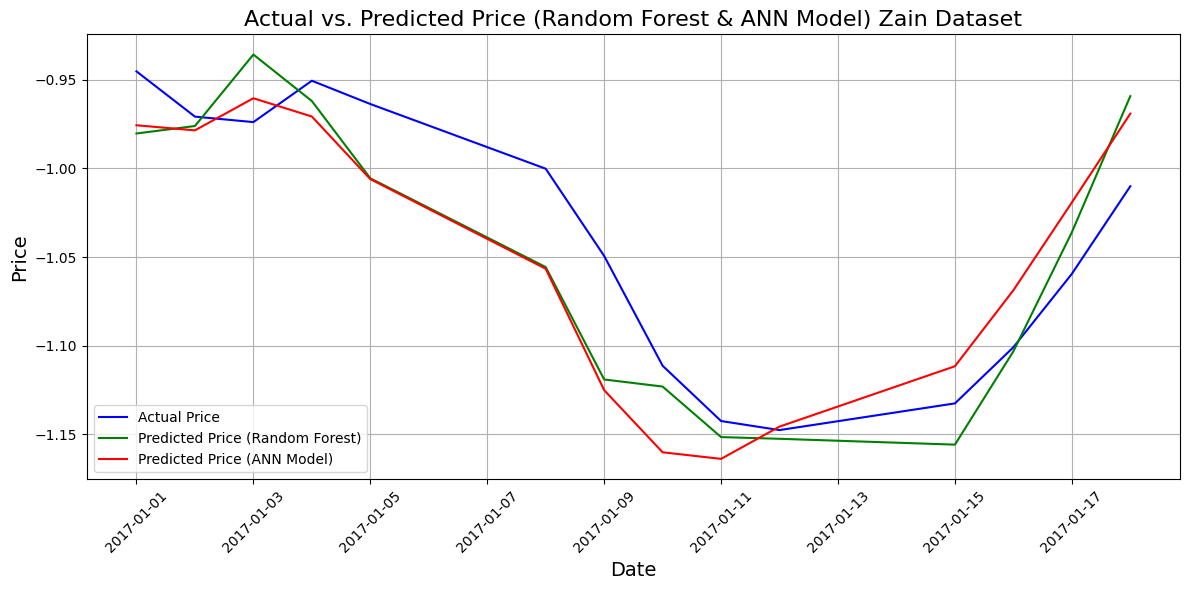

In [149]:
plot_actual_vs_predicted(
    index=ZAIN_DTA_denoised.index[-len(y_test_zain):],
    y_test=y_test_zain,
    tst_prd_dt=pd_rf_zain,
    test_pred_cnn=test_pred_ann_zain,
    title='Actual vs. Predicted Price (Random Forest & ANN Model) Zain Dataset',
    xlabel='Date',
    ylabel='Price'
)

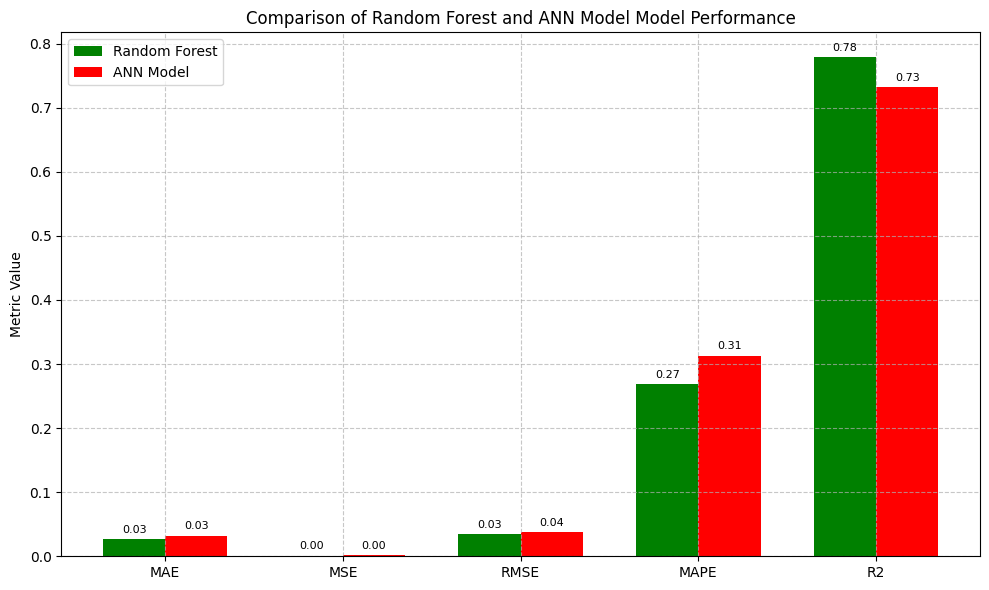

In [150]:
plot_model_metrics_comparison(y_test_zain, pd_rf_zain, test_pred_ann_zain, model_names=['Random Forest', 'ANN Model'])